In [1]:
import os
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
import random
from salishsea_tools import geo_tools, nc_tools, tidetools, viz_tools
import netCDF4 as nc

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
Sep_data2 = rio.open('/home/vdo/Downloads/September_2018_All_Tugs_Hours_Geographic.tif')

In [4]:
data = Sep_data2.read(1)

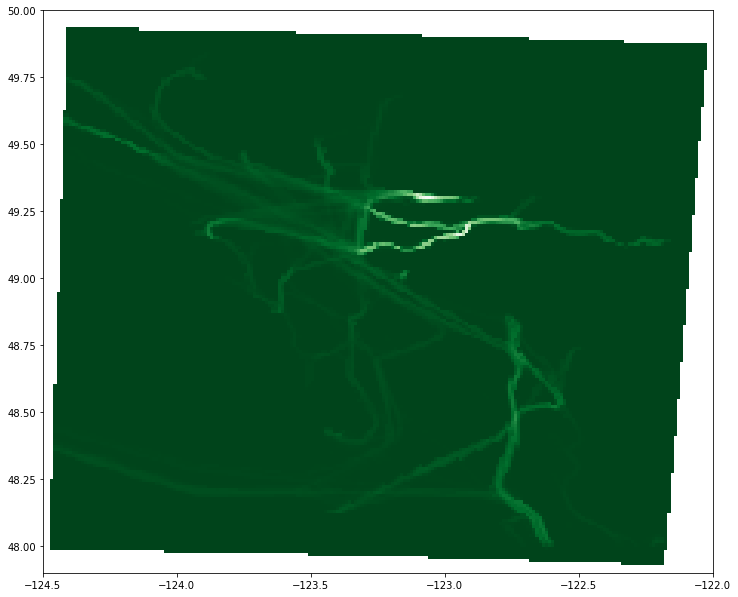

In [5]:
fig, ax = plt.subplots(figsize = (12,12))
show(Sep_data2, ax=ax, cmap = "Greens_r")
ax.set_xlim(-124.5, -122)
ax.set_ylim(47.9, 50);
#fig.savefig("/home/vdo/Pictures/tif_file.png", bbox_inches='tight');

In [6]:
Sep_data2.bounds

BoundingBox(left=-128.6649765716981, bottom=47.930315884019635, right=-121.91792896978994, top=51.02318999694867)

In [7]:
res = Sep_data2.res
print(res)

(0.011455089307144591, 0.011455089307144587)


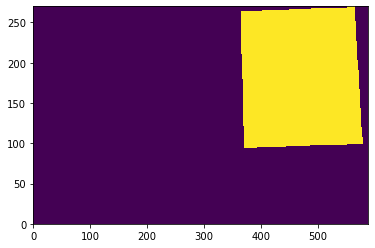

In [21]:
plt.pcolormesh(data)

In [23]:
m = np.argmax(data)
np.unravel_index(m, data.shape)

(150, 488)

In [24]:
lon, lat = Sep_data2.transform * (448,150)
print(lon, lat)

-123.53309656209733 49.30492660087698


In [25]:
lonlat_list = []
n=0
for x in np.arange(lon - res[0]/2, lon + res[0]/2, 0.0001):
    for y in np.arange(lat - res[1]/2, lat + res[1]/2, 0.0001):
        lonlat_list.append([x,y])
        n = n + 1
print(n)

13225


In [26]:
len(lonlat_list)

13225

In [27]:
index = random.choice(np.arange(0,13225,1))

In [28]:
lonlat_list[index]

[-123.53432410675074, 49.30899905622373]

In [29]:
index = random.choices(np.arange(0,13225,1),k=20)

-123.536 49.3071
-123.5297 49.3082
-123.5358 49.3029
-123.5305 49.3093
-123.5323 49.3058
-123.5346 49.3049
-123.5283 49.3026
-123.5285 49.3013
-123.5317 49.3025
-123.5364 49.3026
-123.5296 49.3041
-123.5382 49.3028
-123.5319 49.3096
-123.5287 49.3048
-123.5364 49.3018
-123.5365 49.3087
-123.5379 49.3018
-123.5276 49.3012
-123.5385 49.3028
-123.5336 49.3097


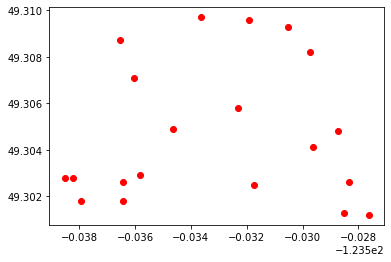

In [30]:
for i in index:
    print(np.round(lonlat_list[i][0], 4), np.round(lonlat_list[i][1], 4))
    plt.plot(lonlat_list[i][0], lonlat_list[i][1], 'ro')

In [31]:
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
bathy, X, Y = tidetools.get_bathy_data(grid)

483 284
483 285
483 283
483 285
483 284
483 284
482 284
482 284
482 284
483 283
482 284
483 283
484 285
482 284
482 283
484 284
482 283
482 284
483 283
484 284


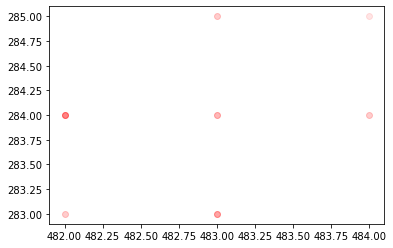

In [35]:
for i in index:
    y,x = geo_tools.find_closest_model_point(lonlat_list[i][0], lonlat_list[i][1], 
                                             X, Y, land_mask = bathy.mask)
    print(y,x)
    plt.plot(y,x,'ro',alpha = 0.1)